In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

i_94 = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


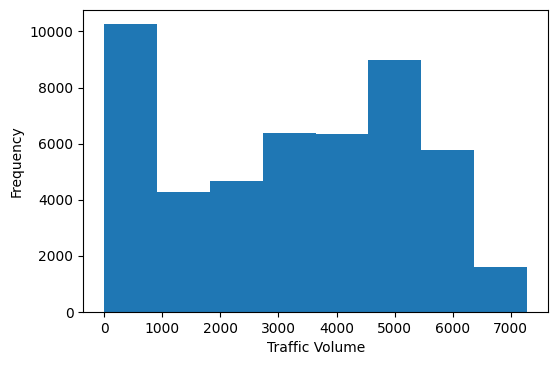

In [19]:
i_94["traffic_volume"].plot.hist(bins=8)
plt.xlabel("Traffic Volume")
plt.show()

In [5]:
i_94["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [6]:
i_94["date_time"] = pd.to_datetime(i_94["date_time"])

day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print(day.shape)
night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


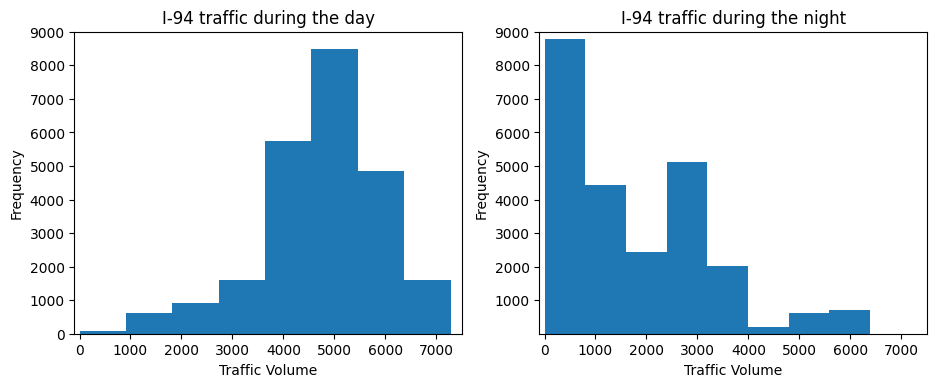

In [14]:
fig = plt.figure(figsize=(11,4))
fig.add_subplot(1,2, 1)
day["traffic_volume"].plot.hist(bins=8)
plt.title("I-94 traffic during the day")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.ylim(0,9000)
plt.xlim(-100, 7500)

fig.add_subplot(1,2, 2)
night["traffic_volume"].plot.hist(bins=8)
plt.title("I-94 traffic during the night")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.ylim(0,9000)
plt.xlim(-100, 7500)
plt.yticks(ticks=[1000*i for i in range(1,10)])
plt.show()


In [8]:
print(day["traffic_volume"].describe(),"\n\n", night["traffic_volume"].describe())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64 

 count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


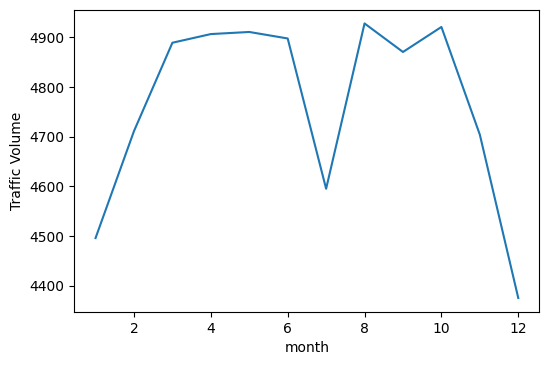

In [20]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month["traffic_volume"].plot.line()
plt.ylabel("Traffic Volume")
plt.show()

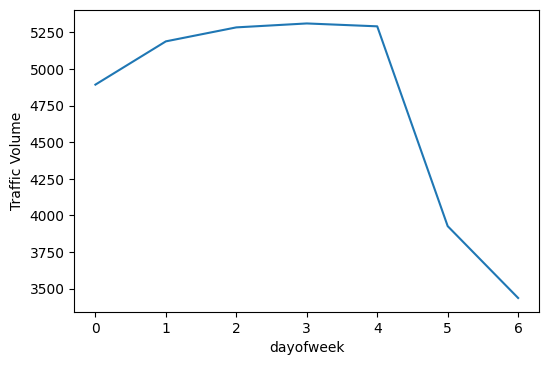

In [21]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek["traffic_volume"].plot.line() # 0 is Monday, 6 is Sunday'
plt.ylabel("Traffic Volume")
plt.show()

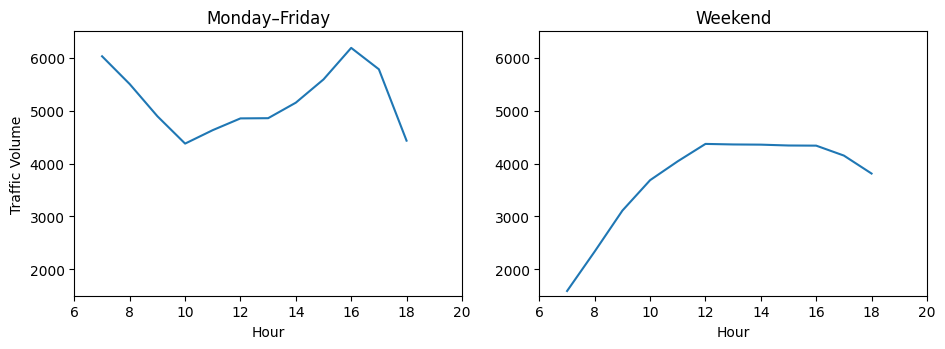

In [24]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Monday–Friday')
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Weekend')
plt.xlabel("Hour")

plt.show()

In [25]:
day.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

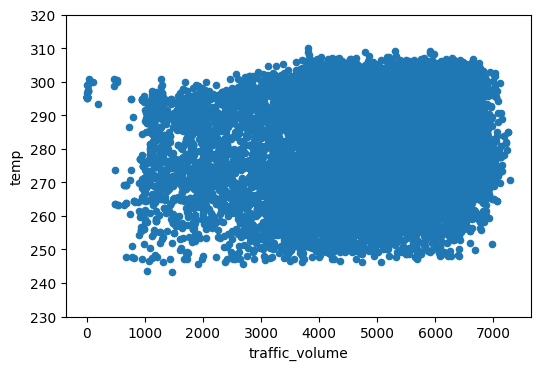

In [30]:
day.plot.scatter("traffic_volume", "temp")
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

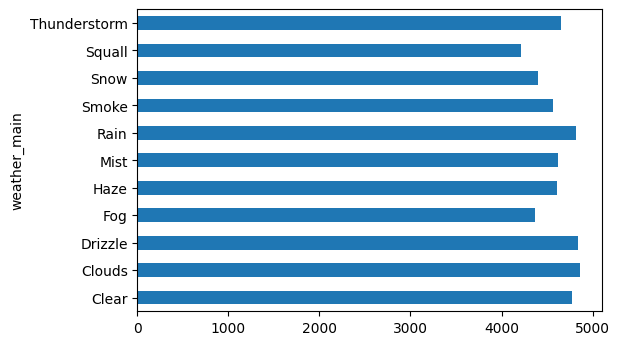

In [31]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main["traffic_volume"].plot.barh()

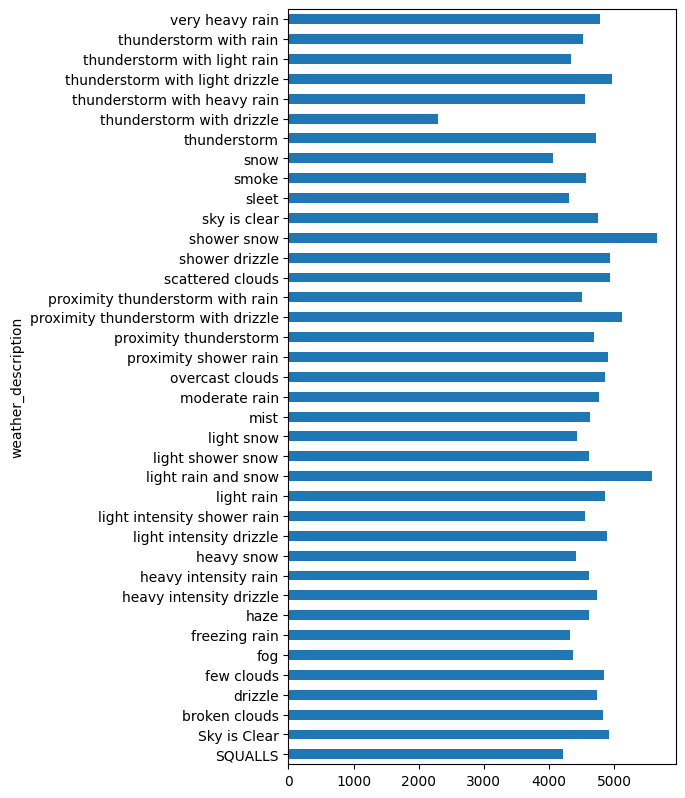

In [33]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description["traffic_volume"].plot.barh(figsize=(5,10))